## Hitter's Count Analysis
> MLB [year] stats
> What are the different "states" of counts for a given AB?

In [1]:
import numpy as np
from graphviz import Digraph
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def make_counts():
    """
    Creates all possible "ball-strike counts" for game of baseball.

    Args:
        None

    Returns:
        counts (list of tuples): List of all possible ball-strike counts
            in form of a tuple where first entry corresponds to ball count
            and second entry corresponds to strike count.
    """
    counts = [(i,j) for i in range(4) for j in range(3)]
    return counts

In [3]:
counts = make_counts()
counts

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)]

In [4]:
def make_count_edges(counts):
    """
    Enumerates all possible "ball-strike count" increments after one pitch
    has been thrown.
    
    Args:
        counts (list of tuples): List of all possible ball-strike counts
            in form of a tuple where first entry corresponds to ball count
            and second entry corresponds to strike count.
    
    Returns:
        count_edges (list of tuples): List of all possible ball-strike counts
            after a single pitch has been thrown. For example, given a (0,0)
            starting count, (1,0) and (0,1) are enumerated options.
    
    Notes:
        No count can have 4 as the ball count or 3 as the strike count.
        This would correspond to a walk or a strikeout respectively.
    """
    # Instantiate output
    count_edges = []

    # Add a single pitch (either a ball or strike) to the current count
    for b,s in counts:
        if b < 3:
            count_edges.append( ((b, s), (b+1, s)) )
        if s < 2:
            count_edges.append( ((b, s), (b, s+1)) )
    
    return count_edges

In [5]:
count_edges = make_count_edges(counts)
count_edges

[((0, 0), (1, 0)),
 ((0, 0), (0, 1)),
 ((0, 1), (1, 1)),
 ((0, 1), (0, 2)),
 ((0, 2), (1, 2)),
 ((1, 0), (2, 0)),
 ((1, 0), (1, 1)),
 ((1, 1), (2, 1)),
 ((1, 1), (1, 2)),
 ((1, 2), (2, 2)),
 ((2, 0), (3, 0)),
 ((2, 0), (2, 1)),
 ((2, 1), (3, 1)),
 ((2, 1), (2, 2)),
 ((2, 2), (3, 2)),
 ((3, 0), (3, 1)),
 ((3, 1), (3, 2))]

In [6]:
# placeholder for BA for a given count
# https://spiderselite.com/2018/03/25/count-hitting-results/#
count_ba = {
    (0,0): .345,
    (1,0): .344,
    (2,0): .350,
    (3,0): .407,
    (0,1): .324,
    (1,1): .332,
    (2,1): .344,
    (3,1): .363,
    (0,2): .157,
    (1,2): .166,
    (2,2): .183,
    (3,2): .211,
}

In [7]:
# placeholder for total count of ABs with a given ball-strike count
edge_AB_cnts = {edge:np.random.randint(10000) for edge in count_edges}
edge_AB_cnts

{((0, 0), (1, 0)): 3865,
 ((0, 0), (0, 1)): 4022,
 ((0, 1), (1, 1)): 5136,
 ((0, 1), (0, 2)): 5244,
 ((0, 2), (1, 2)): 6334,
 ((1, 0), (2, 0)): 1743,
 ((1, 0), (1, 1)): 2703,
 ((1, 1), (2, 1)): 8687,
 ((1, 1), (1, 2)): 5143,
 ((1, 2), (2, 2)): 9579,
 ((2, 0), (3, 0)): 8251,
 ((2, 0), (2, 1)): 5365,
 ((2, 1), (3, 1)): 5878,
 ((2, 1), (2, 2)): 5857,
 ((2, 2), (3, 2)): 7537,
 ((3, 0), (3, 1)): 8363,
 ((3, 1), (3, 2)): 645}

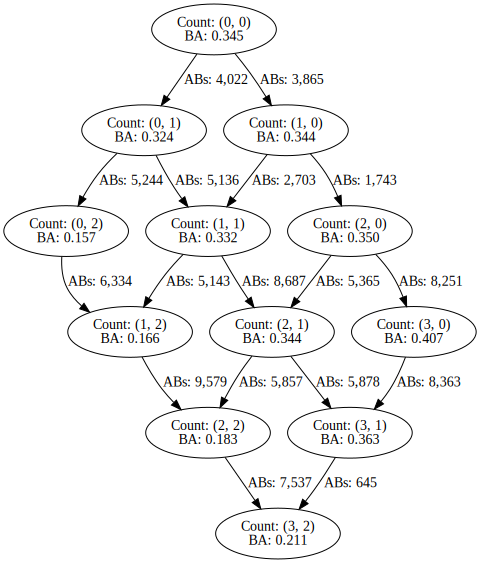

In [8]:
test = Digraph('count_tree', filename='count_tree.gv')

test.attr('node', shape='ellipse')

for count in counts:
    test.node(str(count), label=f"Count: {count}\nBA: {count_ba[count]:.3f}")

for strt_cnt,next_cnt in count_edges:
    test.edge(str(strt_cnt), str(next_cnt), label=f"ABs: {edge_AB_cnts[strt_cnt,next_cnt]:,}")

test